# 1. What is Box Plot?
A Box Plot (also called a Box-and-Whisker Plot) is a chart that shows the spread and summary of a numerical column (like price, score, sales, etc.).

It tells you:

The minimum

The 25th percentile (Q1)

The median (middle value)

The 75th percentile (Q3)

The maximum (excluding outliers)

📌 It can also show outliers — values that are very far from most of the data.

🔍 Visual Breakdown of a Box Plot:

<pre>
|------|===========|------|
 min    Q1   median   Q3    max
</pre>


📍 The box shows where the middle 50% of the data is.

📍 The line inside the box is the median (middle value).

📍 The "whiskers" (lines outside the box) show the spread of the rest of the data.

📍 Any dots beyond the whiskers are outliers.


# 2. Why Do We Use Box Plot?
<table>
    <tr>
        <th>Purpose</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Understand Spread</td>
        <td>You can see if the data is spread out or tight.</td>
    </tr>
    <tr>
        <td>Find The Median</td>
        <td>Easily spot the middle value.</td>
    </tr>
    <tr>
        <td>Detect Outliers</td>
        <td>Outliers (very high/low values) are shown clearly.</td>
    </tr>
    <tr>
        <td>Compare Groups</td>
        <td>Great for comparing numeric data across categories (e.g., income by gender, scores by class).</td>
    </tr>
    
</table>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def load_dataset(df_name, file_path):
    file_path = file_path
    df_name = df_name
    
    df_name = pd.read_csv(file_path)
    if df_name is None:
        raise FileNotFoundError("File Path Not Found")
    
    df = pd.DataFrame(df_name)
    return df

In [14]:
df = load_dataset(file_path= r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv",df_name = "sales")

In [15]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [16]:
# fix column names
def fix_column_names(dataframe):
    dataframe.columns = [col.lower().replace(" ", "_") for col in dataframe.columns]
    
# call the fix_column_names
fix_column_names(df)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [17]:
num_cols = [col for col in df.columns if df[col].dtypes in ["float64","int64"]] 
print(num_cols)

['unit_price', 'quantity', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']


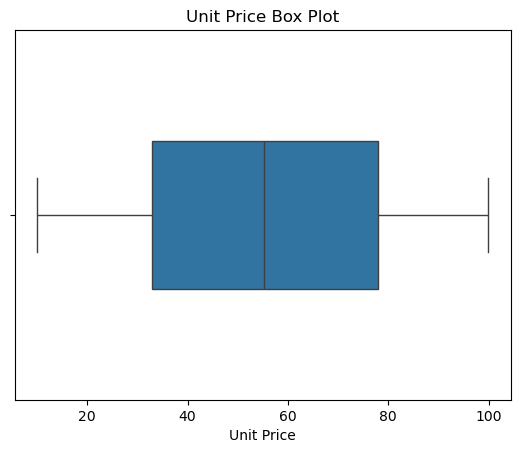

In [19]:
# Create a basic Box Plot
sns.boxplot(x = "unit_price", data = df, width=0.4) # horizontal
plt.title("Unit Price Box Plot")
plt.xlabel("Unit Price")
plt.show()

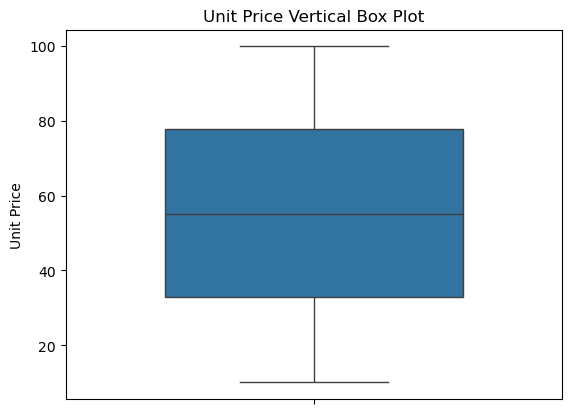

In [21]:
sns.boxplot(y = "unit_price", data = df, width=0.6) # vertical
plt.title("Unit Price Vertical Box Plot")
plt.ylabel("Unit Price")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_25680\2654388159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "gender", y = "cogs", data = df, palette="YlOrBr_r")


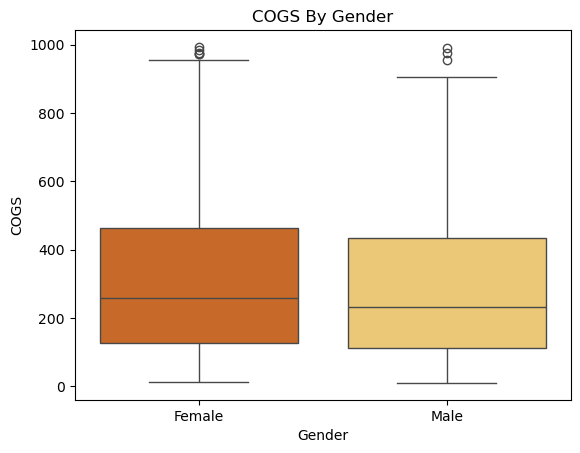

In [23]:
# Create a basic Box plot on one numeric variable by a Categorical variable
sns.boxplot(x = "gender", y = "cogs", data = df, palette="YlOrBr_r")
plt.title("COGS By Gender")
plt.xlabel("Gender")
plt.ylabel("COGS")
plt.show()

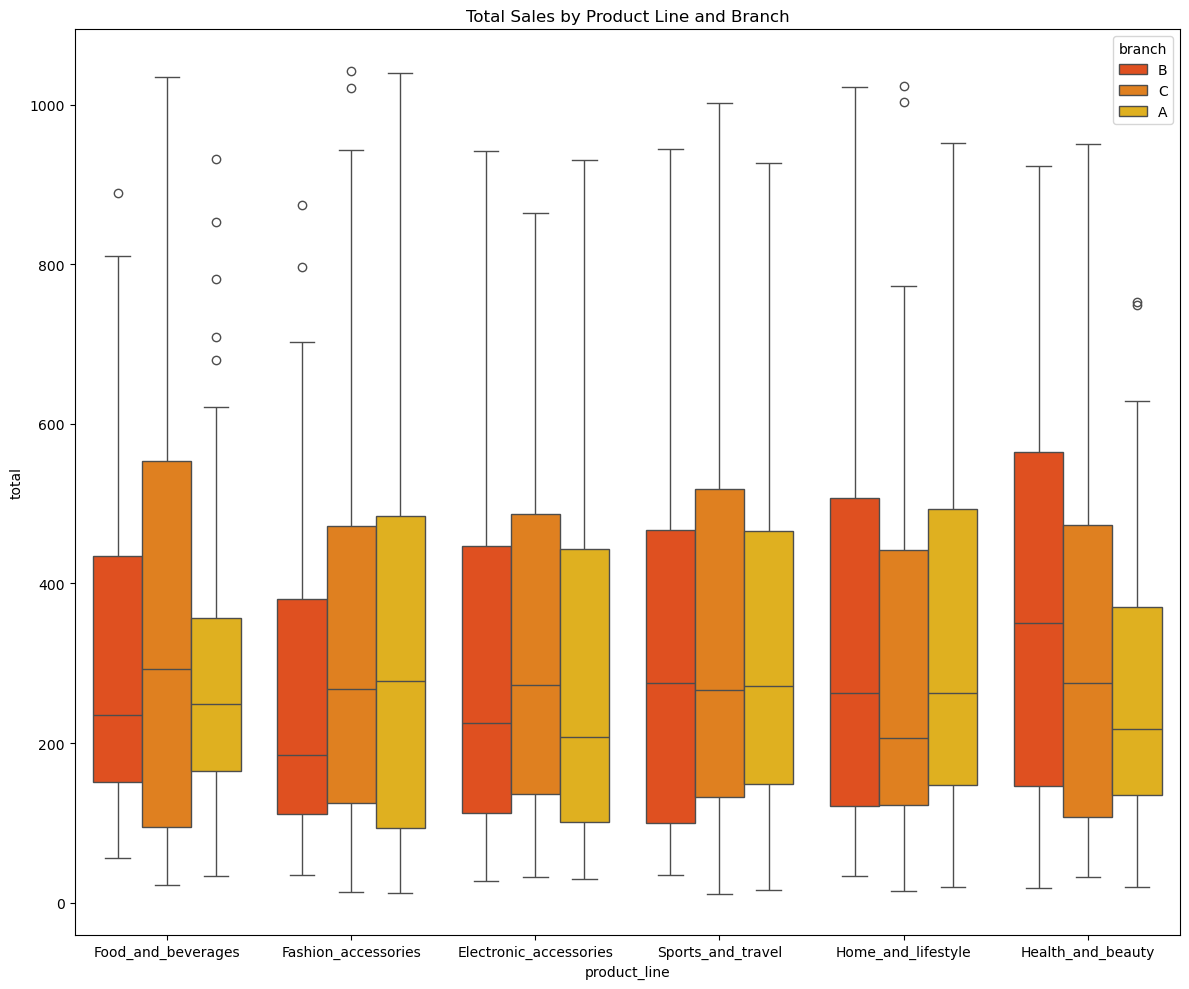

In [26]:
# Create a basic Box plot on one numeric variable by Two Categorical variable using hue attribute
plt.figure(figsize = (12, 10))
sns.boxplot(x ="product_line" , y = "total", hue = "branch", data = df, palette="autumn")
plt.title("Total Sales by Product Line and Branch")
plt.tight_layout()
plt.show()

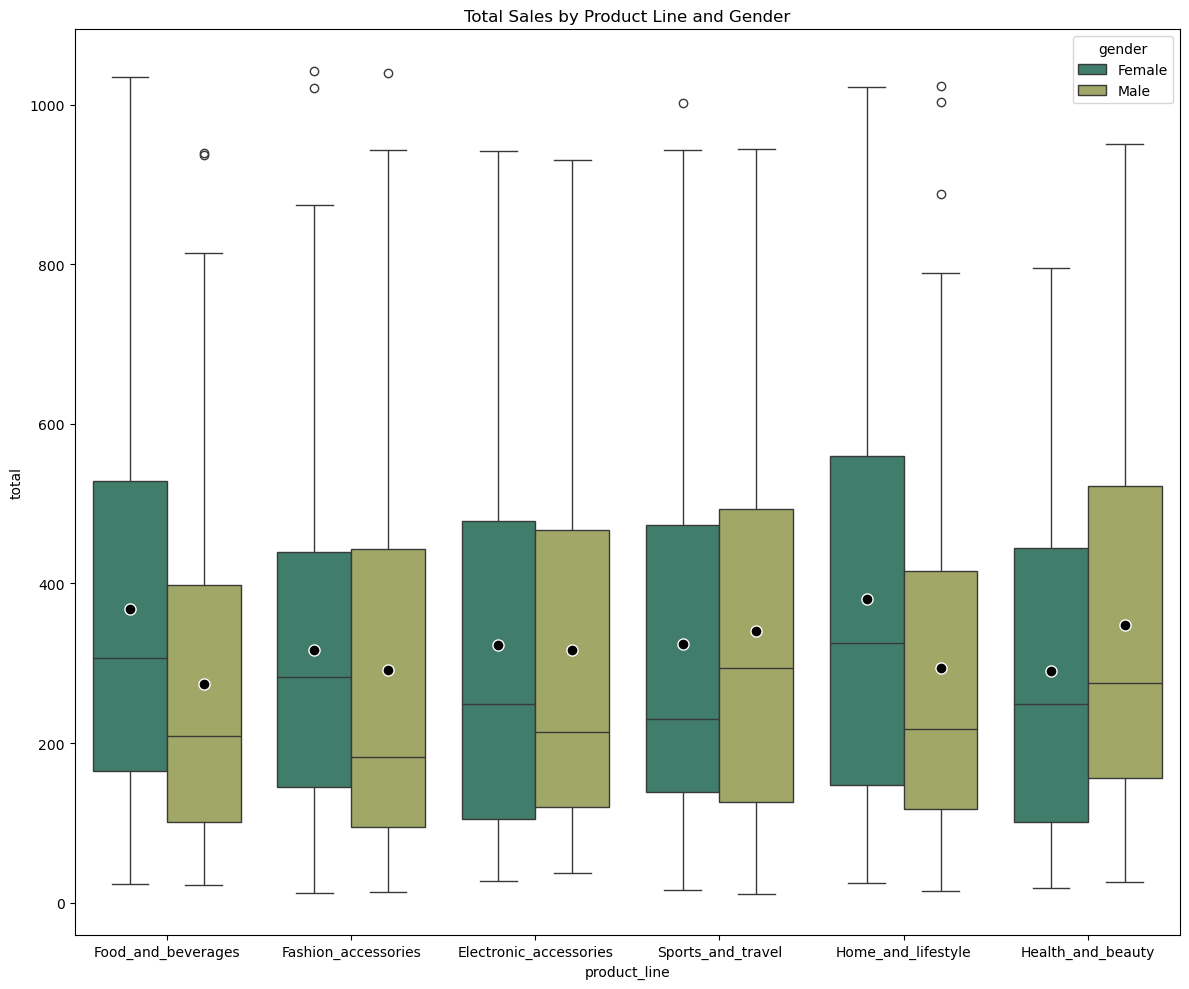

In [29]:
# showmeans attribute
plt.figure(figsize = (12, 10))
sns.boxplot(x ="product_line" , 
            y = "total", 
            hue = "gender",
            data = df,
            palette="gist_earth",
            showmeans = True,
            meanprops = {
                "marker": "o",
                "markerfacecolor": "black",
                "markersize": "8",
                "markeredgecolor": "white"
            })
plt.title("Total Sales by Product Line and Gender")
plt.tight_layout()
plt.show()

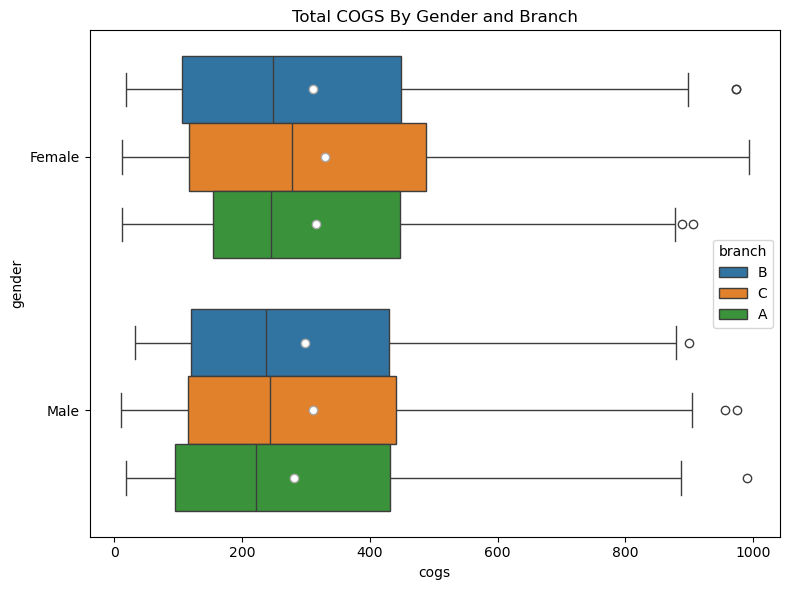

In [31]:
# Horizontal
plt.figure(figsize = (8,6))
sns.boxplot(x = "cogs", y = "gender", hue = "branch", data = df,showmeans = True,
            meanprops = {
                "marker": "o",
                "markerfacecolor": "white",
                "markersize": "6",
                "markeredgecolor": "darkgray"
            })
plt.title("Total COGS By Gender and Branch")
plt.tight_layout()
plt.show()